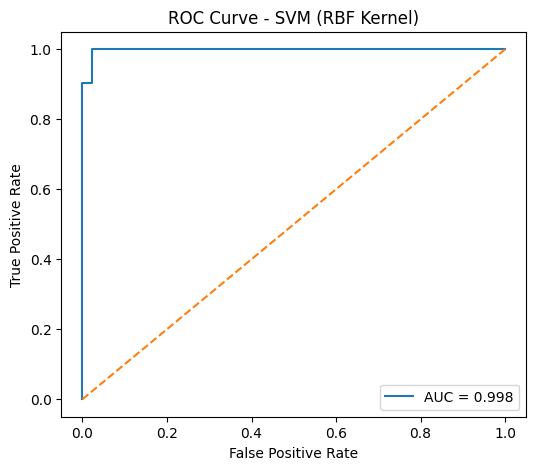

===== TASK COMPLETED SUCCESSFULLY =====
Linear SVM Accuracy: 0.9736842105263158
Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}
AUC Score: 0.9976851851851851

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Saved Files:
✔ outputs/roc_curve.png
✔ outputs/classification_report.txt
✔ outputs/results_summary.txt
✔ outputs/svm_breast_cancer_pipeline.pkl


In [1]:
# ===============================
# Task 11: SVM – Breast Cancer Classification
# Complete One-Cell Executable Program
# ===============================

import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# -------------------------------
# Create output directory
# -------------------------------
os.makedirs("outputs", exist_ok=True)

# -------------------------------
# Load Dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# Baseline Linear SVM
# -------------------------------
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", probability=True))
])

linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)

# -------------------------------
# RBF SVM with GridSearchCV
# -------------------------------
rbf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True))
])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.01, 0.1, 1]
}

grid = GridSearchCV(
    rbf_pipeline,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# -------------------------------
# Model Evaluation
# -------------------------------
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# -------------------------------
# ROC Curve & AUC
# -------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (RBF Kernel)")
plt.legend()
plt.savefig("outputs/roc_curve.png")
plt.show()

# -------------------------------
# Save Model
# -------------------------------
joblib.dump(best_model, "outputs/svm_breast_cancer_pipeline.pkl")

# -------------------------------
# Save Reports
# -------------------------------
with open("outputs/classification_report.txt", "w") as f:
    f.write(report)

summary = f"""
SVM Breast Cancer Classification Summary

Linear SVM Accuracy : {linear_accuracy:.4f}
Best RBF Parameters : {grid.best_params_}
RBF SVM AUC Score   : {roc_auc:.4f}

Model Pipeline:
StandardScaler + SVM (RBF Kernel)
"""

with open("outputs/results_summary.txt", "w") as f:
    f.write(summary)

# -------------------------------
# Final Console Output
# -------------------------------
print("===== TASK COMPLETED SUCCESSFULLY =====")
print("Linear SVM Accuracy:", linear_accuracy)
print("Best Parameters:", grid.best_params_)
print("AUC Score:", roc_auc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print("\nSaved Files:")
print("✔ outputs/roc_curve.png")
print("✔ outputs/classification_report.txt")
print("✔ outputs/results_summary.txt")
print("✔ outputs/svm_breast_cancer_pipeline.pkl")
